27/11-2021
# Group 45

- Varga, Zoltán György
- Zhao, Henan
- Rokas, Armandas

# 02807: Project 2
 
## Practical information
 
* This project must be completed in groups of 3 students.
    * The group must be registered on the course site on DTU Learn: My Course > Groups
    * Groups must be registered anew (even if you already registered for Project 1)
* This project must be handed in as a jupyter notebook to the course site on DTU Learn. 
    * Go to the Course Content > Assignments tab to upload your submission. 
* This project is due on Monday, November 29, 20:00.

## Submission rules

* Each group has to hand in *one* notebook (`.ipynb`) with their solutions, including a filled out Contribution table (see below).
* Your solution must be written in Python.
* For each question you should use the cells provided ("`# your code goes here`" and "*your explanation here*") for your solution
    * It is allowed to add code cells within a question block, but consider if it's really necessary.
* You should not remove the problem statements, and you should not modify the structure of the notebook.
* Your notebook should be runnable and readable from top to bottom.
    * Meaning that your code cells work when run in order (from top to bottom).
    * Output of any cell depends only on itself and cells above it.
* Your notebook should be submitted after having been run from top to bottom.
    * This means outputs are interpretable without necessarily running your cells.
    * The simplest way to achieve this is using the jupyter menu item Kernel > Restart & Run All just prior to submission. If any cell fails when you do this, your notebook is not ready for submission.
    * Exercise 3 in particular will take time to finish, plan accordingly, that is, make sure you have time to run your notebook from top to bottom.
* Failure to comply may make it impossible for us to evaluate your submission properly, which will likely negatively impact the points awarded.

## Solution guidelines
* Data processing is via Spark for the first three exercises and pandas/SQL in the fourth exercise.
* Where naming of dataframes and functions are explicitly stated, these must be used.
* Your solutions will be evaluated by correctness, code quality and interpretability of the output. 
    * You have to write clean, readable and efficient Spark code that will generate sensible execution plans.
    * You have to write clean, readable and efficient SQL queries.
    * Your tables and visualisations should be meaningful and easy to read. This requires, but is not limited to, including headers, legends and well-written (brief) descriptions for graphs/charts. In this step you've found the data processing solution, so put also some effort into its presentation.

## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 150.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
    * Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
    * Several group members can take credit for the same solution if they all have contributed substantially to it.
* Each group member must contribute **at least 65 points**. 
    * If no name is provided for an exercise's part, **all group members** are considered contributors to it.
* Group members should decide amongst themselves how to collaborate on the project to meet these constraints.  
* Scores are individual. The score $\text{score}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{score}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$
  
  
* The following is an example of a contributions table:

|        | Exercise 1 | Exercise 2 | Exercise 3 | Exercise 4 |
|--------|------------|------------|------------|------------|
| **Part 1** | John       |    Mary        |     Ann       |   Mary, Ann         |
| **Part 2** |     Mary       |    Mary        |   Ann         |    John, Ann        |
| **Part 3** |     John, Mary, Ann       |      John, Ann      |   John         | John      |
| **Part 4** | Ann       |  Ann          |     John, Mary       | John       |
| **Part 5** | **n.a.**     | John, Mary, Ann           | **n.a.**       | **n.a.**       |


* **Example**: in the contribution table above, suppose that all parts are solved correctly except for those of Exercise 4 which are all wrong. Then Ann's score is calculated as follows:

  * $\text{individual-score}(Ann) = \frac{5+5+10+5+5+15+15}{5+5+10+5+5+15+15+15+5} = \frac{60}{80} = 0.75$

  * $\text{group-score} = \frac{95}{150} = 0.633$

  * $\text{score}(Ann) = 7.5\cdot 0.75 + 2.5 \cdot 0.633 = 7.21$


# Group contribution table 

This table must be filled before submission.



In [ ]:
import pandas as pd

d = {'Exercise 1' : ['', '', '', '', 'n.a'], 
     'Exercise 2' : ['', '', '', '', ''],
     'Exercise 3' : ['', '', '', '', 'n.a'],
     'Exercise 4' : ['', '', '', '', 'n.a'],
     } 
  
ct = pd.DataFrame(d, index=['Part 1', 'Part 2', 'Part 3', 'Part 4', 'Part 5']) 

ct

,Exercise 1,Exercise 2,Exercise 3,Exercise 4
Part 1,,,,
Part 2,,,,
Part 3,,,,
Part 4,,,,
Part 5,n.a,,n.a,n.a


# The AirBnB dataset

<img src="https://www.esquireme.com/public/images/2019/11/03/airbnb-678x381.jpg" alt="airbnb" width="400"/>

[Airbnb](http://airbnb.com) is an online marketplace for arranging or offering lodgings. In the first three exercises you will use Spark to analyze data obtained from the Airbnb website (stricly speaking via data scraped by [insideairbnb](http://insideairbnb.com/get-the-data.html)). The purpose of your analysis is to extract insights about listings as a whole, specifics about London, and sentiment analysis of reviews (word positivity).


## Loading data
The dataset consists of listings (offered lodgings) and reviews (submitted by users). The `.csv`'s you'll work with vary between the first three exercises, but is structured so that the function below will load it into a spark dataframe.

In [ ]:
def load_csv_as_dataframe(path):
    return spark.read.option('header', True) \
                .option('inferSchema', True) \
                .option('multiLine', 'True') \
                .option('escape', '"') \
                .option('mode', 'DROPMALFORMED')\
                .csv(path)

## Imports and Spark session

* You'll need to adapt the `JAVA_HOME` environment variable to your setup. 
* You should set the `spark.driver.memory` value to the amount of memory on your machine. 
* It may be required for you to install some of the packages imported below (e.g. pandasql).

In [ ]:
# Instructions on p. 20 Learning Spark, 2nd ed.
# Here's a quick-guide, googling may also be required
# 1) Install pyspark via conda/pip
#          pyspark requires the JAVA_HOME environment variable is set.
# 2) Install JDK 8 or 11, figure out the install location
#          Suggest to use https://adoptopenjdk.net/
# 3) Update the JAVA_HOME environment variable set programmatically below 
#    with your install location specifics

# JAVA_HOME environment variable is set programatically below
# but you must point it to your local install

import os
os.environ['JAVA_HOME'] = 'C:\Program Files\Eclipse Adoptium\jdk-11.0.13.8-hotspot'

# If you get "Job aborted due to stage failure" and 
# "Python worker failed to connect back." exceptions, 
# this should be solved by additionally setting these 
# environment variables

# os.environ['PYSPARK_PYTHON'] = 'python'
# os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
# os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'notebook'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark import SparkContext, SparkConf

from pandas_profiling import ProfileReport
import string
from dateutil import parser
import datetime
import pandasql as psql

In [ ]:
# Sets memory limit on driver and to use all CPU cores
conf = SparkConf().set('spark.ui.port', '4050') \
        .set('spark.driver.memory', '4g') \
        .setMaster('local[*]')

sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
spark

In [ ]:
sc.getConf().getAll()

[('spark.sql.warehouse.dir',
  'file:/home/arm/Projects/tools_data_science_02807/project_2_my/spark-warehouse'),
 ('spark.driver.host', '192.168.0.21'),
 ('spark.driver.memory', '4g'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.port', '38309'),
 ('spark.app.name', 'pyspark-shell'),
 ('spark.ui.port', '4050'),
 ('spark.rdd.compress', 'True'),
 ('spark.app.id', 'local-1637441571076'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.startTime', '1637441570029')]

# Exercise 1: Listings and cities (20 pts)

In this exercise you must use Spark to do the data processing. 
* For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. 
* For parts requiring visualisation, the `toPandas` call should be followed only by functions necessary to customize the plotting/layout steps (i.e. no data processing take place after your spark dataframe is materialized).


## Part 1: Preparing the dataframe (5 pts)

Your data source is [this zip archive](https://data-download.compute.dtu.dk/c02807/listings.csv.zip) which you must uncompress and place in the same folder as this notebook. It is loaded in the next cell and named `df_listings`.

After the data is read, you should select the columns necessary for exercise 1, 2 and 3 (by reading ahead or iteratively extend this loading code). Name this dataframe `df_listings_analysis` and make use of caching.

Prices are in local currency, but are nonetheless prefixed with `$` and contains thousands separator commas. You will need to remove these characters and cast the price column to `pyspark.sql.types.DoubleType`. Observe that if this casting is not possible, the result of the cast is `null`.

In [ ]:
# Your code goes here

In [ ]:
df_listings = load_csv_as_dataframe('listings.csv')

In [ ]:
df_listings.printSchema()

root
 |-- id: string (nullable = true)
 |-- listing_url: string (nullable = true)
 |-- scrape_id: string (nullable = true)
 |-- last_scraped: string (nullable = true)
 |-- name: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- space: string (nullable = true)
 |-- description: string (nullable = true)
 |-- experiences_offered: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- notes: string (nullable = true)
 |-- transit: string (nullable = true)
 |-- access: string (nullable = true)
 |-- interaction: string (nullable = true)
 |-- house_rules: string (nullable = true)
 |-- thumbnail_url: string (nullable = true)
 |-- medium_url: string (nullable = true)
 |-- picture_url: string (nullable = true)
 |-- xl_picture_url: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_url: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_location: string (nullable

In [ ]:
pd.set_option('display.max_columns',None)
df_listings.limit(3).toPandas()

/home/arm/.local/lib/python3.8/site-packages/pyspark/sql/pandas/conversion.py:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,145320,https://www.airbnb.com/rooms/145320,20190928160308,2019-09-28,In the middle of it all - with a view!,"Mitt boende passar par, kompisar och ensamäven...",A cozy three room flat with great personality....,"Mitt boende passar par, kompisar och ensamäven...",none,"The flat is in the area of Södermalm, the youn...",None,My flat is close to all the major sights. The ...,You can stay in either a room with two single ...,Just ask me everything you want to know of whe...,"No smoking inside, but the balcony is ok.",None,None,https://a0.muscache.com/im/pictures/9172a792-6...,None,703851,https://www.airbnb.com/users/show/703851,Kim,2011-06-15,"Stockholm, Stockholm County, Sweden","Hi, I'm Kim, a dedicated journalist and tv-pro...",N/A,N/A,N/A,t,https://a0.muscache.com/im/pictures/810c29b4-3...,https://a0.muscache.com/im/pictures/810c29b4-3...,None,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Stockholm, Stockholms län, Sweden",Södermalm,Södermalms,None,Stockholm,Stockholms län,118 53,Stockholm,"Stockholm, Sweden",SE,Sweden,59.31364,18.05256,f,Apartment,Private room,2,1.0,1,2,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",None,"$1,272.00",None,None,None,$417.00,2,$0.00,2,1125,2,2,1125,1125,2.0,1125.0,3 months ago,t,0,0,26,26,2019-09-28,72,27,2017-05-30,2019-06-25,97,10,10,10,10,10,10,f,None,None,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.54
1,155220,https://www.airbnb.com/rooms/155220,20190928160308,2019-09-28,"Stockholm, new spacoius villa",Convenient and spacy home full of positive ene...,ABOUT THE HOUSE: Modern villa built in 2010. L...,ABOUT THE HOUSE: Modern villa built in 2010. L...,none,Close to nature and easy access to citylife.,Bikes to borrow and every garden facilies for ...,"Yes regular busses, even late in night so you ...",Everything in the house.,I will make you feel very welcome as much as p...,No smoking,None,None,https://a0.muscache.com/im/pictures/982440/c2b...,None,746396,https://www.airbnb.com/users/show/746396,Madeleine,2011-06-26,"Stockholm, Stockholm County, Kingdom of Sweden",I work with human resources and I live in Stoc...,within a few hours,63%,N/A,f,https://a0.muscache.com/im/pictures/579244fb-b...,https://a0.muscache.com/im/pictures/579244fb-b...,None,2,2,"['emai

In [ ]:
df_listings_analysis=df_listings.select(F.col('id'), F.col('review_scores_rating'),F.col('neighbourhood_cleansed'),F.col('city'),F.col('price'),F.col('property_type'),F.col('reviews_per_month'),F.col('number_of_reviews'))

In [ ]:
df_listings_analysis.show(5)

+------+--------------------+----------------------+---------+---------+-------------+-----------------+-----------------+
|    id|review_scores_rating|neighbourhood_cleansed|     city|    price|property_type|reviews_per_month|number_of_reviews|
+------+--------------------+----------------------+---------+---------+-------------+-----------------+-----------------+
|145320|                  97|            Södermalms|Stockholm|$1,272.00|    Apartment|             2.54|               72|
|155220|                null|            Skarpnäcks|Stockholm|$1,203.00|        House|             null|                0|
|155685|                  94|            Södermalms|Stockholm|$3,209.00|    Apartment|             0.22|               22|
|164448|                  97|            Södermalms|Stockholm|  $597.00|    Apartment|             3.13|              311|
|170651|                  93|            Södermalms|Stockholm|  $734.00|    Apartment|             0.33|               33|
+------+--------

In [ ]:
df_listings_analysis=df_listings_analysis.withColumn("price",pyspark.sql.functions.regexp_replace("price", "\$", ""))

In [ ]:
df_listings_analysis=df_listings_analysis.withColumn("price",pyspark.sql.functions.regexp_replace("price", ",", ""))

In [ ]:
df_listings_analysis=df_listings_analysis.withColumn('price',F.col("price").cast('double'))

In [ ]:
df_listings_analysis.printSchema()

root
 |-- id: string (nullable = true)
 |-- review_scores_rating: string (nullable = true)
 |-- neighbourhood_cleansed: string (nullable = true)
 |-- city: string (nullable = true)
 |-- price: double (nullable = true)
 |-- property_type: string (nullable = true)
 |-- reviews_per_month: string (nullable = true)
 |-- number_of_reviews: string (nullable = true)



In [ ]:
df_listings_analysis.show(5)

+------+--------------------+----------------------+---------+------+-------------+-----------------+-----------------+
|    id|review_scores_rating|neighbourhood_cleansed|     city| price|property_type|reviews_per_month|number_of_reviews|
+------+--------------------+----------------------+---------+------+-------------+-----------------+-----------------+
|145320|                  97|            Södermalms|Stockholm|1272.0|    Apartment|             2.54|               72|
|155220|                null|            Skarpnäcks|Stockholm|1203.0|        House|             null|                0|
|155685|                  94|            Södermalms|Stockholm|3209.0|    Apartment|             0.22|               22|
|164448|                  97|            Södermalms|Stockholm| 597.0|    Apartment|             3.13|              311|
|170651|                  93|            Södermalms|Stockholm| 734.0|    Apartment|             0.33|               33|
+------+--------------------+-----------

## Part 2: Listing and neighbourhood counts (5 pts)

Compute and visualise the number of listings and the number of different neighbourhoods per city, restricted to the 15 cities having the most listings. The x-axis should be ordered by number of listings (high to low).

Make sure to use the `neighbourhood_cleansed` column in your computations.


In [ ]:
# your code goes here

In [ ]:
df_cities=df_listings_analysis.groupBy('city').agg(F.countDistinct('neighbourhood_cleansed'),F.count('id')).orderBy('count(id)', ascending=False)

In [ ]:
df_cities=df_cities.limit(15)

In [ ]:
df_cities=df_cities.withColumnRenamed("count(neighbourhood_cleansed)","Number of neighbourhood")

In [ ]:
df_cities=df_cities.withColumnRenamed("count(id)","Number of listings")

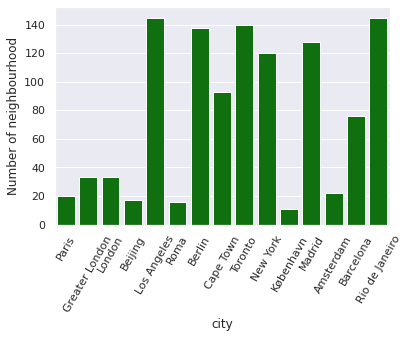

In [ ]:
sns.barplot(x='city',y='Number of neighbourhood',data=df_cities.toPandas(),color='green');
plt.xticks(rotation=60);

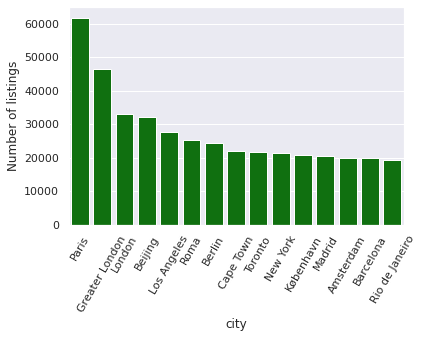

In [ ]:
sns.barplot(x='city',y='Number of listings',data=df_cities.toPandas(),color='green');
plt.xticks(rotation=60);

## Part 3: Price averages (5 pts)

Compute and visualise the average price of listings per city, restricted to the 15 cities having the most listings.

In [ ]:
# your code goes here

In [ ]:
df_price=df_listings_analysis.groupBy('city').agg(F.avg('price'),F.count('id')).orderBy('count(id)', ascending=False)

In [ ]:
df_price=df_price.limit(15)

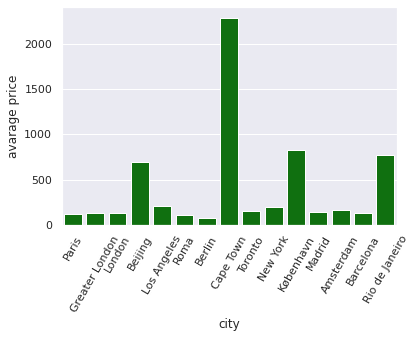

In [ ]:
sns.barplot(x='city',y='avg(price)',data=df_price.toPandas(),color='green');
plt.xticks(rotation=60);
plt.ylabel('avarage price');

## Part 4: Value for money (5 pts)

The value of a listing is its rating divided by its price. The value of a city is the average value of its listings. 

Prices are only comparable when the local currency is the same. We'll therefore consider a subset of Euro-zone cities as defined in `eurozone_cities`.

Compute and visualise the value per city, restricted to the Euro-zone cities.

In [ ]:
eurozone_cities = [
    'Paris', 'Roma', 'Berlin', 'Madrid', 'Amsterdam', 'Barcelona', 'Milano', 'Lisboa',
    'München', 'Wien', 'Lyon', 'Firenze', 'Porto', 'Napoli', 'Bordeaux', 'Venezia',
    'Málaga', 'Sevilla', 'València'
]

In [ ]:
# your code goes here

In [ ]:
df_euro=df_listings_analysis.filter(F.col('city').isin(*eurozone_cities))
df_euro=df_euro.select(F.col('city'),F.col('price'),F.col('review_scores_rating'))

In [ ]:
value=F.col('review_scores_rating')/F.col('price')
df_euro=df_euro.withColumn('Value', value).select(F.col('city'),F.col('value'))

In [ ]:
df_euro=df_euro.groupBy('city').agg(F.avg('value'))

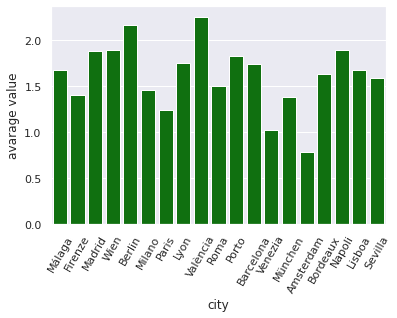

In [ ]:
sns.barplot(x='city',y='avg(value)',data=df_euro.toPandas(),color='green');
plt.xticks(rotation=60);
plt.ylabel('avarage value');

# Exercise 2: The case of London (30 pts)

In this exercise you must use Spark to do the data processing. 
* For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. 
* For parts requiring visualisation, the `toPandas` call should be followed only by functions necessary to customize the plotting/layout steps (i.e. no data processing take place after your spark dataframe is materialized). 
* You may need multiple queries to solve the individual parts.

Your dataframe is a subset of `df_listings_analysis` and should be named `df_listings_london`.

In [ ]:
# your code goes here
df_listings_london=df_listings_analysis.filter(F.col('city')=='London')

## Part 1: Price distribution (5 pts)

Compute and visualise the distribution of prices, for all prices up to and including the 95-percentile. Additionally, compute and visualise the distribution of prices, for all prices above the 95-percentile.

In [ ]:
# your code goes here
price=df_listings_london.select(F.col('price')).summary('95%').select(F.col('price')).first()[0]

In [ ]:
df_london_price_95=df_listings_london.filter(F.col('price')>=price)

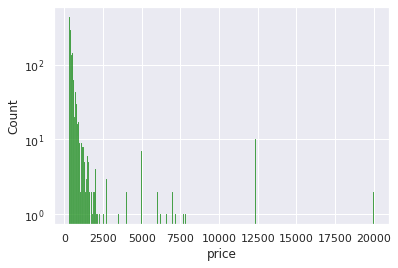

In [ ]:
sns.histplot(x='price',data=df_london_price_95.toPandas(),color='green').set_yscale('log')

In [ ]:
df_london_price94=df_listings_london.filter(F.col('price')<price)

<AxesSubplot:xlabel='price', ylabel='Count'>

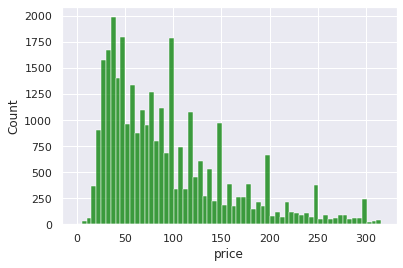

In [ ]:
sns.histplot(x='price',data=df_london_price94.toPandas(),color='green')

## Part 2: Prices by type of property (5 pts)

Compute and visualise the average price and average rating per type of property, for property types with 75 or more listings. 

Your visualisation should be a single bar chart with two y-axes and two bars per property type. The x-axis should be ordered by average rating.

In [ ]:
# your code goes here

In [ ]:
df_listings_london_prop=df_listings_london.groupBy(F.col('property_type')).agg(F.count('property_type'),F.avg('price'),F.avg('review_scores_rating')).filter(F.col('count(property_type)')>=75).orderBy('avg(review_scores_rating)', ascending=False)
pandas_df_listings_london_prop = df_listings_london_prop.toPandas()

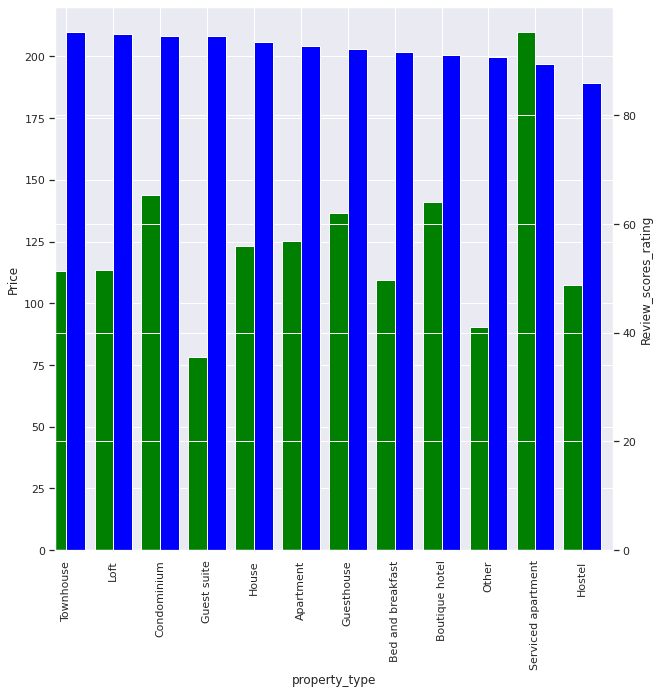

In [ ]:
fig = plt.figure(figsize=(10,10))
pandas_df_listings_london_prop=pandas_df_listings_london_prop.set_index('property_type')
ax = fig.add_subplot(111) 
ax2 = ax.twinx()

width = 0.4

pandas_df_listings_london_prop['avg(price)'].plot(y=pandas_df_listings_london_prop.index,kind='bar', color='green',ax=ax, width=width, position=1)
pandas_df_listings_london_prop['avg(review_scores_rating)'].plot(y=pandas_df_listings_london_prop.index,kind='bar',ax=ax2, color='blue', width=width, position=0)

ax.set_ylabel('Price')
ax2.set_ylabel('Review_scores_rating')
plt.show()

## Part 3: Best offering in the neighbourhood (10 pts)

The value of a listing is its rating divided by its price. Compute and display a dataframe (with the columns you selected in Exercise 1 and those computed in this part) with the 3 highest valued listings in each neighbourhood, and having a value above 5. Make sure to use the `neighbourhood_cleansed` column in your computations.

Computing ranks based on value can be achieved using `pyspark.sql.window.Window`. This may produce equal ranks (i.e. when the value of two listings are the same).

Remember to use `pd.set_option('display.max_rows', <n>)` with appropriate `<n>` so all rows are displayed.

In [ ]:
# your code goes here

In [ ]:
value=F.col('review_scores_rating')/F.col('price')
df_listings_london=df_listings_london.withColumn('Value', value)

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank
windowSpec  = Window.partitionBy("neighbourhood_cleansed").orderBy("Value")
df_listings_london_value=df_listings_london.filter(F.col('Value')>5).withColumn("rank",rank().over(windowSpec)).filter(F.col('Rank')<=3)

In [ ]:
pd.set_option('display.max_rows', 10)
df_listings_london_value.toPandas().head()

,id,review_scores_rating,neighbourhood_cleansed,city,price,property_type,reviews_per_month,number_of_reviews,Value,rank
0,8420459,97,Croydon,London,19.0,Apartment,0.43,20,5.105263,1
1,7208317,92,Croydon,London,18.0,House,0.43,22,5.111111,2
2,23646257,100,Wandsworth,London,19.0,Apartment,0.98,18,5.263158,1
3,18046820,100,Wandsworth,London,18.0,Townhouse,0.05,1,5.555556,2
4,22512980,95,Wandsworth,London,16.0,Apartment,4.28,87,5.937500,3


## Part 4: Activity by month (5 pts)

Activity is given by the number of reviews received in a given time period. Compute and visualise the activity based on month, that is, the total number of reviews given in January, February, etc..

Your additional data source is [this zip archive](https://data-download.compute.dtu.dk/c02807/reviews_london.csv.zip) which you must uncompress and place in the same folder as this notebook. It is loaded in the next cell and named `df_reviews_london`.

In [ ]:
# your code goes here

In [ ]:
df_reviews_london = load_csv_as_dataframe('reviews_london.csv')

In [ ]:
df_reviews_london.show(5)

+----------+---------+----------+-----------+-------------+----------------------------------+
|listing_id|       id|      date|reviewer_id|reviewer_name|                          comments|
+----------+---------+----------+-----------+-------------+----------------------------------+
|  10258151|110317618|2016-10-25|    5636767|        Joyce|              Amaury's flat in ...|
|  10258151|123905694|2016-12-31|   93766809|        Susie|              My family of seve...|
|  10258151|144206394|2017-04-15|   36172507|      Shannon|              The place was as ...|
|  10258151|179218093|2017-08-07|  120542338|      Heather|              An absolutely bea...|
|  10258151|300524159|2018-08-02|   66268334|          Fei|非常完美的住宿选择
1 地理位置得...|
+----------+---------+----------+-----------+-------------+----------------------------------+
only showing top 5 rows



In [ ]:
date=F.to_date(F.col('Date'))

In [ ]:
df_reviews_london=df_reviews_london.withColumn('Date',date)

In [ ]:
#df_reviews_london.select(F.to_date(F.col("Date"))).show()

In [ ]:
df_reviews_london.printSchema()

root
 |-- listing_id: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- reviewer_id: integer (nullable = true)
 |-- reviewer_name: string (nullable = true)
 |-- comments: string (nullable = true)



In [ ]:
df_reviews_london=df_reviews_london.withColumn('month',F.month(F.col('Date')))

In [ ]:
df_london_month=df_reviews_london.groupby('month').agg(F.count('reviewer_id')).orderBy('month',ascending=True)

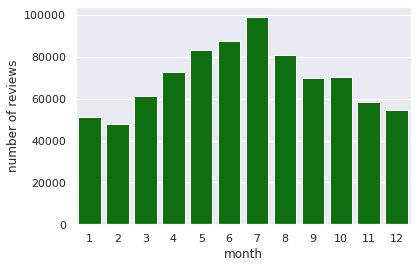

In [ ]:
sns.barplot(x='month',y='count(reviewer_id)',data=df_london_month.toPandas(),color='green');
plt.xticks(rotation=0);
plt.ylabel('number of reviews');

## Part 5: Reviews per listing (5 pts)

Each London listing has received 0 or more reviews. 

Display a dataframe showing 1) The number of listings, 2) The average number of reviews a listing receives, 3) The standard deviation of the reviews per listing distribution, 4) The minimum number of reviews any listing has received, and 5) The maximum number of reviews any listing has received.

In [ ]:
# your code goes here
df_listings_london.describe('number_of_reviews').toPandas()

,summary,number_of_reviews
0,count,33100
1,mean,25.268640483383685
2,stddev,46.943509453552274
3,min,0
4,max,99


# Exercise 3: Word sentiment (45 pts)

In this exercise you must use Spark to do the data processing. For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. You may need multiple queries to solve the individual parts.

The goal here is to determine what sentiment (positive or negative) words in reviews have. Roughly speaking, we want each word to be assigned a score based on the rating of the reviews in which the word occurs in the review comment. We'd expect words such as "clean", "comfortable", "superhost" to receive high scores, while words such as "unpleasant", "dirty", "disgusting" would receive low scores.

As individual reviews do not have a rating, we'll consider the rating of individual reviews to be the rating of its related listing (i.e. assuming each review gave the average rating (`review_scores_rating`) of the listing). 

The score of a word is given by the mean review rating over the reviews in which that word occurs in the comment. We require words to appear in at least 0.5% (1 in 200) listings, and to be at least 4 characters, for it to have a defined score.

Formally, when a word $w$ occurs in at least $0.5\%$ of listings and $|w| > 3$, its score is

$
\begin{align*}
score(w) = \frac{1}{|C_w|}\sum_{comment \in C_w} \text{review_rating}(comment)
\end{align*}
$
, where 
* $C_w = \{comment \mid w \text{ occurs in } \text{clean_text}(comment)\}$, the set (so no duplicates) of comments in which $w$ occurs, and
* $\text{clean_text}(comment)$ is the result of your `clean_text` function defined below, and
* $\text{review_rating}(comment)$ is the `review_scores_rating` of the listing which this $comment$ is related to.


## Part 1: Toy data (15 pts)

To get started we'll consider a toy example where the input is `df_sentiment_listings_toy` and `df_sentiment_reviews_toy` defined in the next code cell. You should provide an implementation of `calculate_word_scores_toy` in the subsequent code cell. Your implementation should result in a query that when given the toy example dataframes as input and is materialized with `toPandas()` produces this table:

|    | word   |   word_score |   listing_occurences |   word_occurences |   comment_occurences |
|---:|:-------|-------------:|---------------------:|------------------:|---------------------:|
|  0 | aaaa   |      7       |                    3 |                 5 |                    5 |
|  1 | bbbb   |      6.66667 |                    2 |                 3 |                    3 |
|  2 | eeee   |      0       |                    1 |                 1 |                    1 |
|  3 | dddd   |      5       |                    1 |                 1 |                    1 |
|  4 | cccc   |      5       |                    2 |                 2 |                    2 |'

Observe that `word_occurences` and `comment_occurences` are the same as words occuring multiple times in a comment are counted once, and that `clean_text` is used to ignore casing and discard non-words. Additionally, any word occuring at least once will occur in more than 1 out of 200 listings on this toy data.

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType

schema_listings = StructType([
    StructField('id', StringType(), True),
    StructField('review_scores_rating', StringType(), True),
])
data_listings = [
    {'id': '0', 'review_scores_rating': '10'},
    {'id': '1', 'review_scores_rating': '5'},
    {'id': '2', 'review_scores_rating': '0'},
]
df_sentiment_listings_toy = spark.createDataFrame(data_listings, schema_listings)

schema_reviews = StructType([
    StructField('listing_id', StringType(), True),
    StructField('id', StringType(), True),
    StructField('comments', StringType(), True),
])
data_reviews = [
    {'listing_id': '0', 'id': '100', 'comments': 'aaaa bbbb          cccc'},
    {'listing_id': '0', 'id': '101', 'comments': 'aaaa bbbb '},
    {'listing_id': '0', 'id': '102', 'comments': 'aaaa aAAa          aaaa'},
    {'listing_id': '1', 'id': '103', 'comments': 'Aaaa bbb ccc'},
    {'listing_id': '1', 'id': '104', 'comments': 'dddd %ˆ&*'},
    {'listing_id': '2', 'id': '105', 'comments': 'AaaA'},
    {'listing_id': '2', 'id': '106', 'comments': 'bbbb ccc e&eˆˆee'},
    {'listing_id': '2', 'id': '107', 'comments': 'cccc cccc'},
]

df_sentiment_reviews_toy = \
    spark.createDataFrame(data_reviews, schema_reviews) \
        .select(F.col('listing_id'), F.col('id').alias('comment_id'), F.col('comments'))


In [ ]:
"""
        Cleans the text (comment) associated with col. The
        cleaning should:
            1) Lower case the text
            2) Turn multiple whitespaces into single whitespaces
            3) Remove anything but letters, digits and whitespaces
        
        :col: A Spark Column object containing text data
        :returns: A Spark Column object.
"""
def clean_text(col):
    col = F.lower(col)
    col = F.split(col, " ")
    col = F.array_remove(col, "")
    col = F.array_remove(col, " ")
    col = F.array_join(col, " ")
    col = F.regexp_replace(col, '[^a-zA-Z0-9 ]', '')
    return col


"""
        Calculates the word score over listings in df_list and
        reviews in df_rev. The table produced should have the 
        same columns as specified in part 1.
        
        :returns: A pandas DataFrame
"""
def calculate_word_scores_toy(df_list, df_rev):
    return df_list.join(df_rev,df_list['id']==df_rev['listing_id'])\
        .select(F.col('comment_id'),F.col('listing_id'), F.col('review_scores_rating'),F.col('comments'))\
        .withColumn('word', F.explode(F.array_distinct(F.split(clean_text(F.col('comments')),' '))))\
        .filter(F.length(F.col('word'))>3)\
        .groupBy('word')\
        .agg(
            F.avg('review_scores_rating').alias('word_score'),\
            F.countDistinct('listing_id').alias('listing_occurences'),\
            F.count('word').alias('word_occurences'),\
            F.countDistinct('comment_id').alias('comment_occurences'))\
        .crossJoin(df_rev.groupby().count().withColumnRenamed('count', 'total_n_listing'))\
        .filter(F.col('listing_occurences')/F.col('total_n_listing')>0.005)\
        .drop(F.col('total_n_listing'))\
        .toPandas()

calculate_word_scores_toy(df_sentiment_listings_toy, df_sentiment_reviews_toy)

,word,word_score,listing_occurences,word_occurences,comment_occurences
0,aaaa,7.000000,3,5,5
1,bbbb,6.666667,2,3,3
2,eeee,0.000000,1,1,1
3,dddd,5.000000,1,1,1
4,cccc,5.000000,2,2,2


## Part 2: London comments (15 pts)

In this part we'll calculate word scores for the comments related to London listings only. You should implement `count_relevant_listings` and `calculate_word_scores` (it will be an extension of your function from part 1) below. See the mathematical definition and docstrings for intended behaviour.

The function `calculate_word_scores` should return the top 10 and bottom 10 words by score. You should **not** use caching in your function.

Make sure your satisfy all conditions for a word to be scored (e.g. correctly calculating how many total listings scores are computed over). You should also consider whether your query is optimally structured in terms of computation time. Moreover, `pd.set_option('display.max_rows', <n>)` should be set with sufficiently high `n` to show all words.

In [ ]:
pd.set_option('display.max_rows', 20)
"""
    Calculates the number of listings in df_list that has a 
    review in df_rev. A listing that is reviewed more than once
    should only count as one.

    :returns: An integer 
"""
def count_relevant_listings(df_list, df_rev):
    return df_list.select(F.col('id').alias('listing_id')).join(df_rev,'listing_id')\
    .select(F.countDistinct('listing_id').alias('count')).collect()[0]['count']         

"""
    Calculates the word score over listings in df_list and
    reviews in df_rev. The value of listings_count should 
    be used to filter out words not occuring frequently enough
    in comments. The table produced should have the same columns
    as in part 1 of this exercise.

    :returns: A pandas DataFrame containing the top 10 and 
    bottom 10 words based on their word score, sorted by word_score.
"""
def calculate_word_scores(df_list, df_rev, listings_count):
    word_score_df = df_list.select( F.col('id').alias('listing_id'), F.col('review_scores_rating'))\
        .join(df_rev.select(F.col('listing_id'), F.col('id').alias('comment_id'), clean_text(F.col('comments')).alias('comments')),'listing_id')\
        .withColumn('word', F.explode(F.array_distinct(F.split(F.col('comments'),' '))))\
        .filter(F.length(F.col('word'))>3)\
        .groupBy('word')\
        .agg(
            F.avg('review_scores_rating').alias('word_score'),\
            F.countDistinct('listing_id').alias('listing_occurences'),\
            F.count('word').alias('word_occurences'),\
            F.countDistinct('comment_id').alias('comment_occurences'))\
        .filter(F.col('listing_occurences')/listings_count>0.005)
    
    return word_score_df.sort(F.desc('word_score'))\
            .limit(10)\
            .union(word_score_df\
                    .sort(F.asc('word_score'))
                    .limit(10))\
            .toPandas()

In [ ]:
# should not be modified
from IPython.display import display

relevant_listings_count_london = count_relevant_listings(df_listings_london, df_reviews_london)
word_scores_london_timing = %timeit -o -n1 -r1 display( \
    calculate_word_scores(df_listings_london, \
                          df_reviews_london, \
                          relevant_listings_count_london) \
)

word_scores_london_timing.best

,word,word_score,listing_occurences,word_occurences,comment_occurences
0,granola,97.543210,152,243,243
1,homemade,97.268557,475,1199,1199
2,superhost,97.088050,665,795,795
3,yogurt,97.036458,243,384,384
4,yoghurt,97.014019,146,214,214
5,baked,96.936803,295,538,538
6,muesli,96.935115,178,262,262
7,divine,96.847458,161,177,177
8,exquisite,96.675182,257,274,274
9,crouch,96.618982,153,727,727


2min 2s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


122.6124344350028

## Part 3: Scalability (10 pts)

The listings from London make up a little less than 2% of the entire set of listings. In this part we're interested in how the amount of input data impacts computation time, that is, how `calculate_word_scores` scales as data increases. To this end, we've made multiple samples of the dataset of varying sizes.

The experiment reuses `count_relevant_listings` and `calculate_word_scores` that you implemented in part 2. Code needed for this part is provided to you. 

Your task is to obtain the data sources, run the code cells below, and explain the results you get. Specifically, you must explain any non-linear relationship between data size and computation time, using the markdown cell at the end of this part. In finding explanations, using the Spark UI to investigate the anatomy of your queries may prove valuable. Once you've found an explanation, state a potential solution to remedy the issue. Lastly, include a paragraph stating the specifications of your computer hardware (memory, CPU cores and clock speed, solid state disk or not) on which the experiment has been run.

*Implementation note* Make sure you've properly configured `spark.driver.memory` (it requires a kernel restart to update the value). It may be that your query fails on the larger samples due to running out of compute resources. This is likely caused by a suboptimal `calculate_word_scores`, but can be from reaching the limits of your hardware. If you think the latter is the case, argue for this perspective in the markdown cell.

Your data sources are (uncompress and place in the same directory as this notebook):
* 0.25%: [listings](https://data-download.compute.dtu.dk/c02807/listings_0-dot-25percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_0-dot-25percent.csv.zip)
* 0.5%: [listings](https://data-download.compute.dtu.dk/c02807/listings_0-dot-5percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_0-dot-5percent.csv.zip)
* 1%: [listings](https://data-download.compute.dtu.dk/c02807/listings_1-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_1-dot-0percent.csv.zip)
* 2%: [listings](https://data-download.compute.dtu.dk/c02807/listings_2-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_2-dot-0percent.csv.zip)
* 4%: [listings](https://data-download.compute.dtu.dk/c02807/listings_4-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_4-dot-0percent.csv.zip)
* 8%: [listings](https://data-download.compute.dtu.dk/c02807/listings_8-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_8-dot-0percent.csv.zip)
* 12.5%: [listings](https://data-download.compute.dtu.dk/c02807/listings_12-dot-5percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_12-dot-5percent.csv.zip)
* 16%: [listings](https://data-download.compute.dtu.dk/c02807/listings_16-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_16-dot-0percent.csv.zip)
* 25%: [listings](https://data-download.compute.dtu.dk/c02807/listings_25-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_25-dot-0percent.csv.zip)
* 50%: [listings](https://data-download.compute.dtu.dk/c02807/listings_50-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_50-dot-0percent.csv.zip)
* 75%: [listings](https://data-download.compute.dtu.dk/c02807/listings_75-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_75-dot-0percent.csv.zip)
* 100%: [listings](https://data-download.compute.dtu.dk/c02807/listings_100-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_100-dot-0percent.csv.zip)

In [ ]:
import time
def calculate_word_scores_timed(percent_str):
    """
        Calculates word scores over a sampled dataset indicated
        by percent_str.
        
        :returns: A dictionary with benchmarking information and
        the calculated values.
    """
    df_listings = load_csv_as_dataframe(f'listings_{percent_str}percent.csv')
    df_reviews = load_csv_as_dataframe(f'reviews_{percent_str}percent.csv')
    
    listings_count = count_relevant_listings(df_listings, df_reviews)

    start = time.time()
    df_word_scores = calculate_word_scores(df_listings, df_reviews, listings_count)
    end = time.time()
    return {
        'percentage': float(percent_str.replace('-dot-', '.')), 
        'time_spent': f"{end - start:.2f}", 
        'relevant_listings': listings_count, 
        'df': df_word_scores
    }

In [ ]:
data_percentages = [
    '0-dot-25', '0-dot-5', '1-dot-0', '2-dot-0', '4-dot-0', '8-dot-0',
    '12-dot-5', '16-dot-0', '25-dot-0'
]
score_data = {
    percentage_str: calculate_word_scores_timed(percentage_str) for percentage_str in data_percentages
}

In [ ]:
score_data['50-dot-0'] = calculate_word_scores_timed('50-dot-0')

In [ ]:
score_data['75-dot-0'] = calculate_word_scores_timed('75-dot-0')

In [ ]:
score_data['100-dot-0'] = calculate_word_scores_timed('100-dot-0')

In [ ]:
df_scores_scaling = pd.DataFrame(score_data).T.convert_dtypes()
df_scores_scaling.time_spent = df_scores_scaling.time_spent.astype(float)

# Access to word scores of 2 percent data: df_scores_scaling.loc['2-dot-0'].df
df_scores_scaling

,percentage,time_spent,relevant_listings,df
0-dot-25,0.25,16.77,2529,word word_score listing_occurences...
0-dot-5,0.5,30.87,5040,word word_score listing_occure...
1-dot-0,1.0,59.40,10143,word word_score listing_occurence...
2-dot-0,2.0,160.62,20575,word word_score listing_occurences...
4-dot-0,4.0,327.75,40919,word word_score listing_occure...
8-dot-0,8.0,324.90,81756,word word_score listing_occure...
12-dot-5,12.5,506.69,128202,word word_score listing_occure...
16-dot-0,16.0,641.12,163627,word word_score listing_occure...
25-dot-0,25.0,1030.78,256183,word word_score listing_occure...
50-dot-0,50.0,2458.44,511667,word word_score listing_occure...


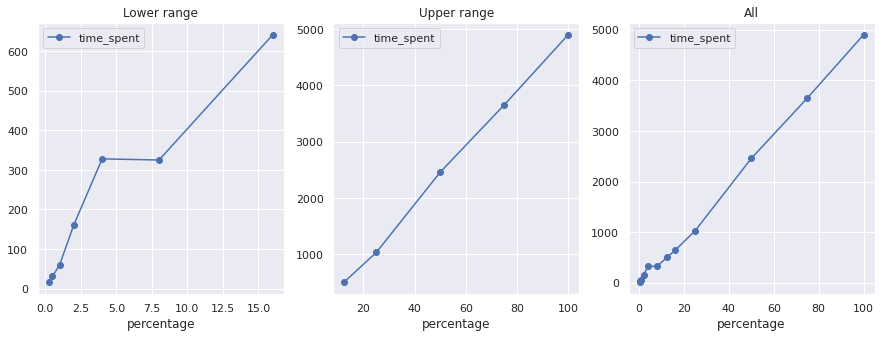

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

lower_range = ['0-dot-25', '0-dot-5', '1-dot-0', '2-dot-0', '4-dot-0', '8-dot-0', '16-dot-0']
df_scores_scaling[df_scores_scaling.index.isin(lower_range)] \
    .plot.line(x='percentage', y='time_spent', ax=axes[0], style='-o', title='Lower range')
df_scores_scaling[~df_scores_scaling.index.isin(lower_range)] \
    .plot.line(x='percentage', y='time_spent', ax=axes[1], style='-o', title='Upper range')
_ = df_scores_scaling \
    .plot.line(x='percentage', y='time_spent', ax=axes[2], style='-o', title='All')
plt.show()


*Your explanation to the questions outlined at the start of this part goes here. Make sure you've addressed all questions asked.*

The most significant non-linear relationhsip between a datasize and a computation time is when the data size increases from 4% to 8%. The explanation of this phenomenon could be that the strategy used to join two datasets changes from Broadcast Hash Join to Shuffle Sort Merge Join, which can be seen at figures from Spark UI below (the explanation continues after the figures). 

- Execution DAG, when a file of 4% data was executed:

![](https://drive.google.com/uc?id=1BTyCFhG45u-NwnPm_SPuzyaLRLbG9IpU)

- Execution DAG, when a file of 8% data was executed:

![](https://drive.google.com/uc?id=1fOKGW37VxCPit56TQ8RtUf1jxpibhxbs)


The reason why the strategy has been changed is that the smaller dataset, which in this case the listing dataset gets bigger than the default `autoBroadcastJoinThreshold`, which is in fact 10mb (double checked with `spark.conf.get('spark.sql.autoBroadcastJoinThreshold')` function). Notice also that the 4% file itself is more than 10mb, but it can be seen in Spark UI that after filtering only 6mb left, so this value was used to determine, which strategy to pick up the Broadcast Hash Join. However, the size of filtered 8% listing file is not clearly defined in Spark UI, so it's assumed double size of filtered 4% file, which gives 12mb. This is more than the default value of the broadcast join threshold, therefore the the suffle sort merge join strategy is used.    

So it seems, that the Sort stragegy is more efficient for this dataset and this execution environment(one executor node with multi-core processor). So this non-linear relationship could be elimintated by forcing to use a Shuffle Sort Merge Join for all dataset. This can be done with  `spark.conf.set("spark.sql.autoBroadcastJoinThreshold", "-1")`. 



The specifications of the computer hardware:
- CPU:    

```
arm@arm-DELL:~$ lscpu
Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   39 bits physical, 48 bits virtual
CPU(s):                          8
On-line CPU(s) list:             0-7
Thread(s) per core:              2
Core(s) per socket:              4
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           142
Model name:                      Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz
Stepping:                        10
CPU MHz:                         2858.066
CPU max MHz:                     3400.0000
CPU min MHz:                     400.0000
```

- Memory : 8GB

- Storage type: **SDD** 

In [ ]:
spark.conf.get('spark.sql.autoBroadcastJoinThreshold')

'10485760b'

## Part 4: Robustness (5 pts)

In this part we'll explore robustness of our word scores, using the values we computed in part 3. We'll do so by comparing top/bottom words for three different samples of the dataset. Specifically, the scores from your maximum (e.g. 100%) computed sample are to be compared with the 12.5% and 2.0% scores.

Compute and display a dataframe that accounts for any word found in either of the three samples' top/bottom words, and additionally shows the related `word_score` and `word_occurences` values.

Note that `df_scores_scaling.loc['100-dot-0'].df` provides the word scores dataframe of the 100% sample (similarly for the other two). For this part you should rely on pandas functionality only.  Moreover, `pd.set_option('display.max_rows', <n>)` should be set with sufficiently high `n` to show all rows.

In [ ]:
pd.set_option('display.max_rows', 40)
diff_scores_df = df_scores_scaling.loc['100-dot-0'].df.drop(['listing_occurences', 'comment_occurences'],axis=1)\
            .merge(df_scores_scaling.loc['12-dot-5'].df.drop(['listing_occurences', 'comment_occurences'],axis=1), how='outer', on='word',suffixes=('_100-dot-0','_12-dot-5'))\
            .merge(df_scores_scaling.loc['2-dot-0'].df.drop(['listing_occurences', 'comment_occurences'],axis=1).add_suffix('_2-dot-0').rename(columns={'word_2-dot-0':'word'}), how='outer', on='word')
diff_scores_df['diff_100_dot_0_&_12-dot-5'] = diff_scores_df['word_score_100-dot-0']-diff_scores_df['word_score_12-dot-5']
diff_scores_df['diff_100_dot_0_&_2-dot-0'] = diff_scores_df['word_score_100-dot-0']-diff_scores_df['word_score_2-dot-0']
diff_scores_df

,word,word_score_100-dot-0,word_occurences_100-dot-0,word_score_12-dot-5,word_occurences_12-dot-5,word_score_2-dot-0,word_occurences_2-dot-0,diff_100_dot_0_&_12-dot-5,diff_100_dot_0_&_2-dot-0
0,nashville,97.516653,115358.0,97.659638,15319.0,97.466266,2164.0,-0.142986,0.050386
1,thoughtfulness,97.476566,9900.0,97.515439,1263.0,NaN,NaN,-0.038874,NaN
2,muffins,97.431538,18251.0,97.443093,2056.0,NaN,NaN,-0.011555,NaN
3,meticulously,97.367484,6686.0,97.461538,858.0,NaN,NaN,-0.094054,NaN
4,baked,97.364583,22464.0,NaN,NaN,97.412658,395.0,NaN,-0.048075
5,homemade,97.361255,43528.0,97.343959,5678.0,97.548755,964.0,0.017296,-0.187500
6,immaculate,97.332979,95030.0,97.329122,12032.0,NaN,NaN,0.003857,NaN
7,goodies,97.327466,28407.0,NaN,NaN,97.528369,564.0,NaN,-0.200903
8,touches,97.322585,398475.0,97.335983,50200.0,NaN,NaN,-0.013398,NaN
9,magazine,97.312592,17662.0,NaN,NaN,97.563525,488.0,NaN,-0.250933


# Exercise 4: Transactions analysis (55 pts)

In this exercise the goal is to analyse historical business transactions (sales of parts to other companies), and derive insights about both products and customers.

The company X produces and globally sells gadget parts to a number of other companies. You requested the sales department of X to provide you with access to the customer and sales transactions database. To your horror, you've found no such database exists, but the data is instead manually maintained in a spreadsheet (error-prone solution). Intrepid as you are, you've accepted to receive the spreadsheet data as a `.csv`, realizing already data cleaning will be necessary.

Your first step (parts 1 and 2) is to clean the data after which you will derive insights about X's business operations (parts 3 and 4).

The input data is available here: [transactions.csv](http://courses.compute.dtu.dk/02807/2021/projects/project2/transactions.csv)

**Using SQL**

In this final exercise you must write SQL to do the data processing in parts 3 and 4. This entails using `psql.sqldf` to execute your queries (up against `df_transactions_cleaned`) which will return a pandas dataframe. Each question should be answered with a *single* query. For visualisation the `psql.sqldf` call should be followed only by functions necessary to customize the plotting/layout steps or reshape the dataframe (i.e. no data processing take place after your SQL statement is materialized as a pandas dataframe).

In part 1 and 2 of this exercise, you should make use of pandas functionality.



## Part 1: Data cleaning (15 pts)

For each column in the dataframe, investigate and **correct** problematic aspects such as,
* Missing values: Insert meaningful values (data imputation). Detectable as `np.nan`'s. A typical value for imputation is the *mode* (most frequent value) of the distribution. If no proper data imputation is possible, you may resort to dropping rows.
* Incorrect values: Typos and other data mishaps are present as values are manually entered. Detectable as low-prevalence categorical values, or ambigious data links (e.g. company listed in multiple countries). If no proper value correction is possible, you may resort to dropping rows.

In both cases, your strategy for replacing values should be data-driven, that is, shaped by the patterns you observe in the data. It is allowed to skip correcting the data (and instead drop the rows) if few rows are improved by your corrections. If in doubt, do the correction.

After all your cleaning steps are completed, you should run the `PandasProfiler` on your cleaned dataset, which should now contain 0% missing cells. Lastly, summarize the issues you identified and how you addressed them.

### Read, profile and explain

As the first step, load the data naming the dataframe `df_transactions`, and make a copy named `df_transactions_cleaned` on which your data cleaning steps will be done. Establish an overview using `PandasProfiler` (but realize there's more to cleaning than what this tool will let you know). Write a paragraph on what the data is about (e.g. what does a row constitute), and a paragraph on what the profile report tells you.

In [ ]:
# your code goes here
df_transactions = pd.read_csv("transactions.csv")

In [ ]:
profile = ProfileReport(df_transactions, title="Historical Business Transactions Dataset", html={'style': {'full_width': True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the profile report, we can see that there are six 
columns in the dataframe: 1)part. The main characteristic is that the values are series of numbers. Missing values is a problem here for further analysis. 2)company. Thoughtmix has the maximum number of 
transactions among companies. 3)country. The reported  shows that most transactions took place at Portugal.
And the first major problem with this variable is that
almost 10.6% values are missing. 4)city. That is the city
of corresponding country. 5)price. As shown in report, there are some missing values. Most importantly, price may be recorded in different currency. 6)date. The main problem
for date variable is that there are some different time formats. So it should be formalized. In addition, based on
the correlation matrix, the column country, city, and company are much more related. 

### Country column

In [ ]:
# your code goes here
# Have an overview of the column
df_transactions['country'].value_counts()

Portugal          7383
France            3463
Greece            1630
United Kingdom    1511
Spain             1425
United States     1256
Germany           1125
Netherlands        427
Japan              159
Switzerland         11
Portuga              5
US                   1
Tyskland             1
Name: country, dtype: int64

In [ ]:
# Check if there is any missing value
df_transactions['country'].isnull().values.any()

True

In [ ]:
# The most frequent value of country distribution
mode_country = df_transactions['country'].value_counts().index[0]

for i in range(len(df_transactions['country'])):
    s = df_transactions['country'][i]
    # Deal with the missing values
    if pd.isnull(s):
        df_transactions['country'][i] = mode_country
    # Transfer the value to string
    if type(s) != type('s'):
        s = str(s)
    # Remove the space
    s = s.strip()
    # Correct the wrong spelling or transfer abbreviation and language
    if s == 'Portuga':
        df_transactions['country'][i] = 'Portugal'
    if s == 'Tyskland':  
        df_transactions['country'][i] = 'Germany'
    if s == 'US':
        df_transactions['country'][i] = 'United States'

In [ ]:
# Show the result
df_transactions['country'].value_counts()

Portugal          9559
France            3463
Greece            1630
United Kingdom    1511
Spain             1425
United States     1257
Germany           1126
Netherlands        427
Japan              159
Switzerland         11
Name: country, dtype: int64

### Company column

In [ ]:
# your code goes here
# Have an overview of the column
df_transactions['company'].value_counts()

Thoughtmix       2795
Twitterbeat      2268
Zooxo            1670
Chatterbridge    1589
Shufflebeat      1553
Ntags            1514
Buzzbean         1254
Brainsphere      1242
Flipstorm        1193
Wordify           968
Yozio             655
Roodel            627
Eimbee            498
Zoonder           454
Teklist           428
Gabcube           357
Voomm             250
Lajo              220
Avaveo            212
Rhycero           204
Realpoint         158
Riffpath          151
Kanoodle          127
Bubblemix          54
Innojam            44
Gevee              36
Gabtune            27
Tagtune            12
Zooxo.              2
Laj0                1
Ntagz               1
 -                  1
 a                  1
aa                  1
Thoughtmixz         1
Name: company, dtype: int64

In [ ]:
# Check if there is any missing value
df_transactions['company'].isnull().values.any()

False

In [ ]:
# We can see that there are some typos and unknown data
# For typos, we choose to correct
# For unknown data, we choose to delete

# The most frequent value of company column
mode_company = df_transactions['company'].value_counts().index[0]
# Initialize the list of indices needed to be remove
index_company = []

for i in range(len(df_transactions['company'])):
    s = df_transactions['company'][i]
    # Replace the missing values with the mode
    if pd.isnull(s):
        df_transactions['company'][i] = mode_company
    # Transfer to string
    if type(s) != type('s'):
        s = str(s)
    # Remove the space in string 
    s = s.strip()
    # From the overview, we would like to remove the rows with company name 'a' and 'aa' 
    if len(s) <= 2:
        index_company.append(i)

    # Correct typos
    if s == 'Zooxo.':
        df_transactions['company'][i] = 'Zooxo'
    if s == 'Laj0':
        df_transactions['company'][i] = 'Lajo'
    if s == 'Thoughtmixz':
        df_transactions['company'][i] = 'Thoughtmix'
    if s == 'Ntagz':
        df_transactions['company'][i] = 'Ntags'

In [ ]:
df_transactions = df_transactions.drop(index=index_company)

In [ ]:
df_transactions = df_transactions.reset_index(drop=True)

In [ ]:
df_transactions['company'].value_counts()

Thoughtmix       2796
Twitterbeat      2268
Zooxo            1672
Chatterbridge    1589
Shufflebeat      1553
Ntags            1515
Buzzbean         1254
Brainsphere      1242
Flipstorm        1193
Wordify           968
Yozio             655
Roodel            627
Eimbee            498
Zoonder           454
Teklist           428
Gabcube           357
Voomm             250
Lajo              221
Avaveo            212
Rhycero           204
Realpoint         158
Riffpath          151
Kanoodle          127
Bubblemix          54
Innojam            44
Gevee              36
Gabtune            27
Tagtune            12
Name: company, dtype: int64

### City column

In [ ]:
# your code goes here
# Have an overview of city column
df_transactions['city'].value_counts()

Amadora\t       2787
Annecy          2267
London          1669
Lisbon          1667
Barcelona       1589
Porto           1550
Düsseldorf      1254
Braga           1237
New York         966
Athens           812
Patras           653
Aranhas          627
Amiens           498
Boston           453
Arnhem           426
Nanterre         381
Almada           357
Paris            250
Thessaloniki     221
Nice             212
Arcueil          204
Heraklion        151
Niihama          126
Asaka             54
Amsterdam         44
Champagnole       36
Lyon              27
Zürich            12
Monção             1
Vila Fria          1
Name: city, dtype: int64

In [ ]:
# Check if there is any missing value
df_transactions['city'].isnull().values.any()

True

In [ ]:
# The problem here mainly is \t and nan
# Most frequent value of city column
mode_city = df_transactions['city'].value_counts().index[0]

for i in range(len(df_transactions['city'])):
    s = df_transactions['city'][i]
    # Replace the missing values with mode
    if pd.isnull(s):
        s = mode_city
    # Transfer to string then remove the space
    if type(s) != type('s'):
        s = str(s)
    df_transactions['city'][i] = s.strip()

In [ ]:
df_transactions['city'].value_counts()

Amadora         2820
Annecy          2267
London          1669
Lisbon          1667
Barcelona       1589
Porto           1550
Düsseldorf      1254
Braga           1237
New York         966
Athens           812
Patras           653
Aranhas          627
Amiens           498
Boston           453
Arnhem           426
Nanterre         381
Almada           357
Paris            250
Thessaloniki     221
Nice             212
Arcueil          204
Heraklion        151
Niihama          126
Asaka             54
Amsterdam         44
Champagnole       36
Lyon              27
Zürich            12
Monção             1
Vila Fria          1
Name: city, dtype: int64

### Parts column

In [ ]:
# your code goes here
# Have an overview of part column
df_transactions['part'].value_counts()

17156-617     299
37205-992     294
52959-433     293
0268-6107     293
54868-0823    292
             ... 
49288-0655    115
76335-006     109
63629-2733    108
62742-4030    103
59779-028     101
Name: part, Length: 100, dtype: int64

In [ ]:
# Check if there is any missing value
df_transactions['part'].isnull().values.any()

True

In [ ]:
# The problem here is nan
mode_part = df_transactions['part'].value_counts().index[0]
index_part = []
# Create the white list of elements for parts' values
white_list_part = string.digits + '-'

for i in range(len(df_transactions['part'])):
    s = df_transactions['part'][i]
    # Replace the missing value with the mode
    if pd.isnull(df_transactions['part'][i]):
        s = mode_part
    new_s = ''
    # Transfer to string format
    if type(s) != type('s'):
        s = str(s)
    s = s.strip()
    df_transactions['part'][i] = s
    # To double check if the value has the wrong or unknown letters
    # If it is true, delete the corresponding row
    for char in s:
        if char in white_list_part:
            new_s += char
    if new_s != s:
        index_part.append(i)

In [ ]:
# So there is no row to remove
index_part

[]

In [ ]:
# Show the result
df_transactions['part']

0        54868-5165
1        60505-2867
2         24385-268
3         76117-001
4        44946-1046
            ...    
20560     21695-267
20561     49999-737
20562     52343-025
20563    49288-0285
20564     43419-018
Name: part, Length: 20565, dtype: object

### Price column

In [ ]:
# your code goes here
# Have an overview of price column
df_transactions['price'].value_counts()

-           5
163.95€     4
347.43€     4
120.13€     4
244.55€     4
           ..
202.79€     1
507.84€     1
615.46€     1
£1269.48    1
139.56€     1
Name: price, Length: 19211, dtype: int64

In [ ]:
# Check if there is any missing value
df_transactions['price'].isnull().values.any()

True

In [ ]:
# The list of indices that will be removed
remove_index_price = []

for i in range(len(df_transactions['price'])):
    s = df_transactions['price'][i]
    # Deal with the missing values
    if pd.isnull(s):
        # Cause the missing price can not be estimated properly, so just remove it
        remove_index_price.append(i)
        continue
    # Transfer to string format
    if type(s) != type('s'):
        s = str(s)
        df_transactions['price'][i]  = s
    if len(s) <= 1:
        # The price string at least contain a number and a currency symbol
        # So the string with the length less or equal to 1 will be removed
        remove_index_price.append(i)
        continue

In [ ]:
df_transactions = df_transactions.drop(index = remove_index_price)

In [ ]:
df_transactions = df_transactions.reset_index(drop = True)

In [ ]:
# Show the result
df_transactions['price']

0         784.79€
1         187.99€
2         221.73€
3        1075.82€
4         412.55€
           ...   
20554     606.37€
20555     828.37€
20556      686.1€
20557    1051.08€
20558     139.56€
Name: price, Length: 20559, dtype: object

### Date column

In [ ]:
# your code goes here
# Have an overview of date column
df_transactions['date'].value_counts()

10/04/2017             7
2016-04-07             5
2018-12-10             2
2018-12-10             2
2018-10-21             2
                      ..
2016-11-24 20:43:01    1
2016-11-24 20:23:11    1
2016-11-24 19:25:27    1
2016-11-24 19:22:59    1
2019-05-14 22:48:39    1
Name: date, Length: 20543, dtype: int64

In [ ]:
# Check if there is any missing value
df_transactions['date'].isnull().values.any()

False

In [ ]:
# The function checks if the date is valid 
def isValidDate(datestr):
    try:
        parser.parse(datestr)
    except:
        return False
    else:
        return True

In [ ]:
# The list of indices of rows needed to be removed
remove_index_date = []

for i in range(len(df_transactions['date'])):
    s = df_transactions['date'][i]
    # Here is no missing value
    if pd.isnull(s):
        remove_index_date.append(i)
        continue
    # Transfer to string format first
    if type(s) != type('s'):
        s = str(s)
    # If the length of string less than 10, the date information is not intact
    # So remove it
    if len(s) < 10:
        remove_index_date.append(i)
        continue    
    # If it is not a valid date, remove it
    if not isValidDate(s):
        remove_index_date.append(i)
        continue
    # If it is valid, then transfer to datetime format
    if isValidDate(s):
        df_transactions['date'][i] = parser.parse(s)

In [ ]:
df_transactions = df_transactions.drop(index = remove_index_date)

In [ ]:
df_transactions = df_transactions.reset_index(drop = True)

In [ ]:
# Show the result
df_transactions['date']

0        2016-01-02 00:01:05
1        2016-01-02 00:05:26
2        2016-01-02 00:18:30
3        2016-01-02 02:32:30
4        2016-01-02 04:51:55
                ...         
20552    2018-12-31 20:48:14
20553    2018-12-31 21:24:17
20554    2018-12-31 21:38:02
20555    2019-02-21 20:05:00
20556    2019-05-14 22:48:39
Name: date, Length: 20557, dtype: object

### Profile `df_transactions_cleaned` and summarize corrections made

In [ ]:
# your code goes here
df_transactions_cleaned = df_transactions.copy()

In [ ]:
profile_cleaned = ProfileReport(df_transactions_cleaned, title="University Ranking dataset", html={'style': {'full_width': True}})

In [ ]:
profile_cleaned.to_notebook_iframe()

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

During the process of cleaning, there are mainly several
problems. First, for missing values, we choose to replace them with the most frequent value of the column. In some columns, the way of removing them is also applied because of the small amount or difficulty to estimate. Second,
most typos could be estimated by other values, but some rows with unkonwn mistakes would be removed. Third, we also need to unify the values' format. For instance, to transform the date in form of 10/04/2017 to 2017-04-10. 

## Part 2: Standardise prices (5 pts)

Transaction prices are recorded in the local currency of the client (EUR, GBP, USD or JPY). You will need to convert these prices from local currency into the common currency (chosen here as) EUR, for comparability. These standardised prices should be added as a column to the dataframe called `prices_euro`.

Consider a two step process where you 1) Identify what currency has been used, and 2) Calculate the price conversion. Step 1 may reveal the data is still not completely clean (so either correct by impute or drop). For Step 2 look up exchange rates on the Internet.

In [ ]:
# your code goes here
price_list = string.digits + '.'

def transfer_to_euro(s):
    # To calculate more easier, we unify the currency
    num = ''
    price = 0.0
    for char in s:
        if char in price_list:
            num += char
    if len(num) == len(s):
        # If there is no currency symbol, we set it to -1.0 temporarily, then remove it
        price = -1.0
    if '£' in s:
        # GBP transfer to EUR
        price = float(num) * 1.17  
    if '$' in s:
        # USD transfer to EUR
        price = float(num) * 0.87  
    if '¥' in s:
        # JPY transfer to EUR
        price = float(num) * 0.0077
    if '€' in s:
        price = float(num)
    
    return price

In [ ]:
df_transactions_cleaned['prices_euro'] = df_transactions_cleaned['price'].apply(lambda x: transfer_to_euro(x))

In [ ]:
remove_list = df_transactions_cleaned[df_transactions_cleaned['prices_euro']==-1.0]['prices_euro'].index.tolist()

df_transactions_cleaned = df_transactions_cleaned.drop(index = remove_list)

In [ ]:
df_transactions_cleaned = df_transactions_cleaned.reset_index(drop = True)

In [ ]:
df_transactions_cleaned

,part,company,country,city,price,date,prices_euro
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05,784.79
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26,187.99
2,24385-268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30,221.73
3,76117-001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30,1075.82
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55,412.55
...,...,...,...,...,...,...,...
20548,21695-267,Roodel,Portugal,Aranhas,606.37€,2018-12-31 20:48:14,606.37
20549,49999-737,Thoughtmix,Portugal,Amadora,828.37€,2018-12-31 21:24:17,828.37
20550,52343-025,Brainsphere,Portugal,Braga,686.1€,2018-12-31 21:38:02,686.10
20551,49288-0285,Flipstorm,Greece,Athens,1051.08€,2019-02-21 20:05:00,1051.08


## Part 3: Business insights (15 pts)

### Company by revenue

The revenue of a company is its total value of orders, all time. Compute and visualise all companies by revenue in descending order.

In [ ]:
# your code goes here
company_revenue = psql.sqldf("""
SELECT company,
            SUM(prices_euro) AS revenue
        FROM df_transactions_cleaned 
        GROUP BY company
        ORDER BY revenue DESC
""")

In [ ]:
company_revenue

,company,revenue
0,Thoughtmix,1.626839e+06
1,Twitterbeat,1.326135e+06
2,Zooxo,1.003768e+06
3,Shufflebeat,9.223995e+05
4,Chatterbridge,9.211109e+05
5,Ntags,8.462525e+05
6,Brainsphere,7.217602e+05
7,Buzzbean,7.141881e+05
8,Flipstorm,6.732462e+05
9,Wordify,5.277605e+05


In [ ]:
def draw_plot(x_column,y_column,df,hue_list=None):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(20,8),dpi=80)
    df_plot = sns.barplot(x=x_column,y=y_column,hue=hue_list,data=df)
    var = df_plot.set_xticklabels(df_plot.get_xticklabels(),
                            rotation=45)

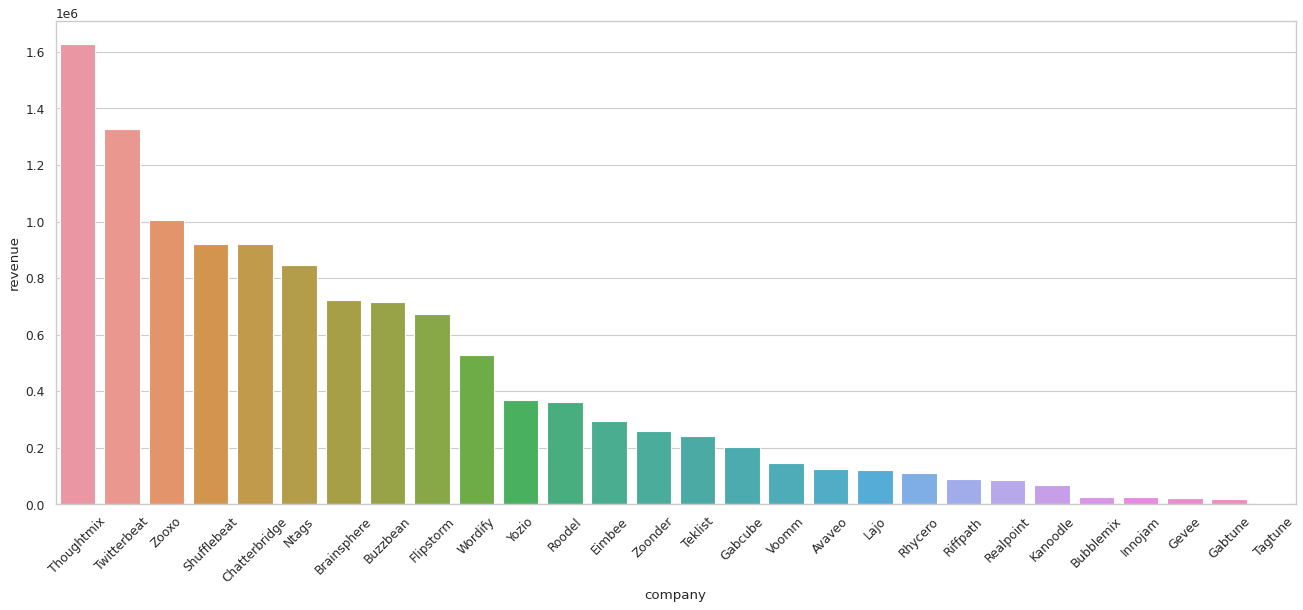

In [ ]:
draw_plot('company','revenue',company_revenue)

### Country by revenue, per year

The revenue of a country in a time period, is its total value of orders in that time period. Compute and visualise all countries by revenue, for years 2016, 2017 and 2018. Your visualisation should have countries on the x-axis and multiple bars (one for each year).

In [ ]:
# your code goes here
country_revenue = psql.sqldf("""
SELECT country,
            SUM(prices_euro) AS revenue,
            strftime('%Y',date) as year
        FROM df_transactions_cleaned 
        GROUP BY country,year
        HAVING year == '2016'
            OR year == '2017'
            OR year == '2018'
        ORDER BY revenue DESC
""")

In [ ]:
country_revenue

,country,revenue,year
0,Portugal,2.237349e+06,2016
1,Portugal,1.725598e+06,2017
2,Portugal,1.577400e+06,2018
3,France,6.906157e+05,2016
4,France,6.621896e+05,2017
5,France,6.609721e+05,2018
6,Greece,4.972277e+05,2016
7,United Kingdom,3.409139e+05,2018
8,United Kingdom,3.269426e+05,2017
9,Spain,3.123314e+05,2018


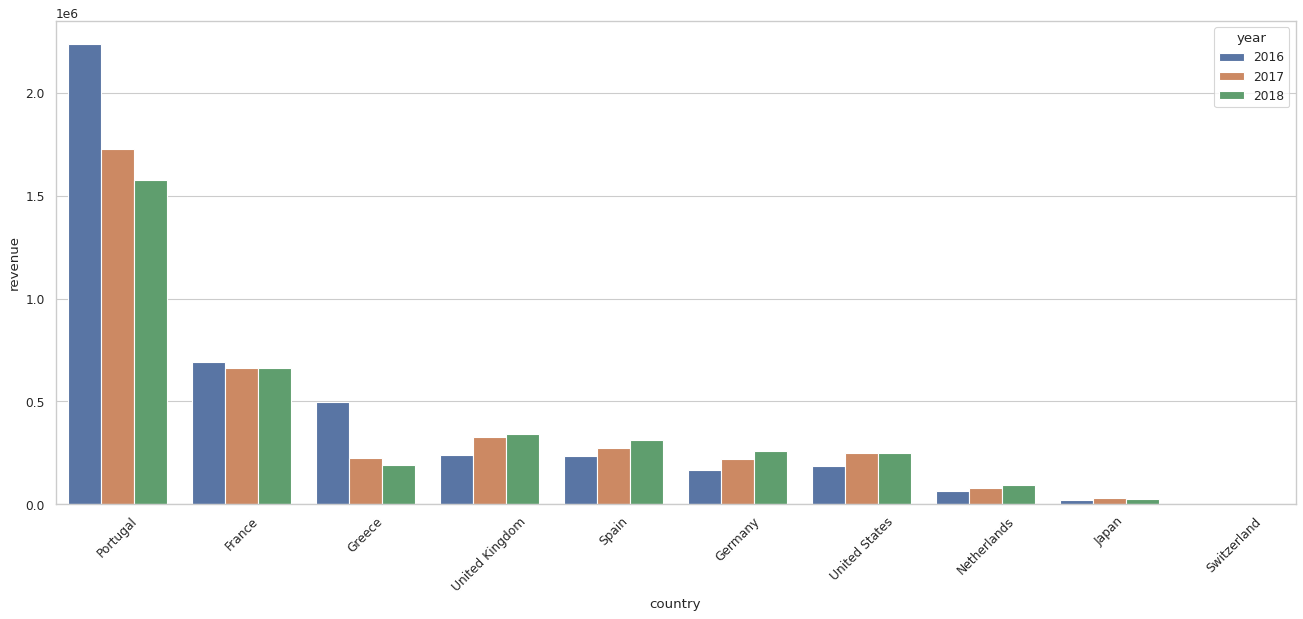

In [ ]:
draw_plot('country','revenue',country_revenue,hue_list='year')

### Orders per quarter, all companies

Compute and visualise the number of orders each company has placed in each quarter. Exclude quarters where the order count is less than 3. As always, be mindful to not produce a cluttered visualisation.

Part of your query should form a variable that converts `date` into `YEAR_QUARTER` format. Dealing with dates is via `STRFTIME` [docs](https://www.sqlite.org/lang_datefunc.html) which doesn't allow quarter extraction. Instead, it allows for extraction of month, which you can case on in order to produce the quarter (Q1, Q2, Q3, Q4).  

In [ ]:
# your code goes here
orders_quarter = psql.sqldf("""
               SELECT company,
               COUNT(date) AS orders,
               CASE 
                 WHEN strftime('%m',date)='01' THEN 'Q1'
                 WHEN strftime('%m',date)='02' THEN 'Q1'
                 WHEN strftime('%m',date)='03' THEN 'Q1'
                 WHEN strftime('%m',date)='04' THEN 'Q2'
                 WHEN strftime('%m',date)='05' THEN 'Q2'
                 WHEN strftime('%m',date)='06' THEN 'Q2'
                 WHEN strftime('%m',date)='07' THEN 'Q3'
                 WHEN strftime('%m',date)='08' THEN 'Q3'
                 WHEN strftime('%m',date)='09' THEN 'Q3'
                 WHEN strftime('%m',date)='10' THEN 'Q4'
                 WHEN strftime('%m',date)='11' THEN 'Q4'
                 WHEN strftime('%m',date)='12' THEN 'Q4'                       
               END AS YEAR_QUARTER
               FROM df_transactions_cleaned
               GROUP BY company,YEAR_QUARTER
               HAVING orders >= 3
               ORDER BY orders DESC
""")

In [ ]:
orders_quarter

,company,orders,YEAR_QUARTER
0,Thoughtmix,728,Q3
1,Thoughtmix,701,Q4
2,Thoughtmix,686,Q2
3,Thoughtmix,679,Q1
4,Twitterbeat,604,Q3
...,...,...,...
104,Gabtune,6,Q2
105,Gabtune,6,Q3
106,Gabtune,6,Q4
107,Tagtune,5,Q1


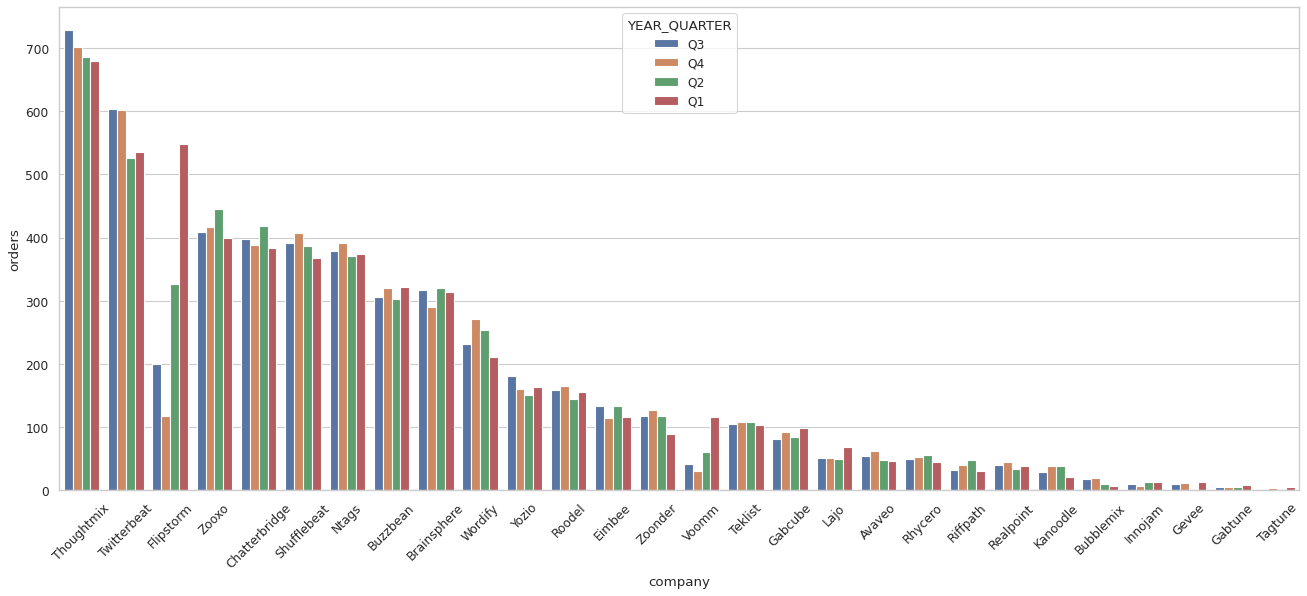

In [ ]:
draw_plot('company','orders',orders_quarter,hue_list='YEAR_QUARTER')

## Part 4: Parts and prices (20 pts)

### Parts demand changes

A different amount of orders are placed on parts each year. The demand of a part is the number of orders placed on it. The demand change of a part is the absolute difference between its average demand in 2016/2017, and its demand in 2018.

Compute and visualise the 15 parts whose demand change has been the largest.

In [ ]:
# your code goes here
parts_demand = psql.sqldf("""
            WITH df_orders AS (
            SELECT part,
                COUNT (part) AS all_demand,
                strftime("%Y",date) AS year
            FROM df_transactions_cleaned 
            GROUP BY part,year
            ),df_average AS (
        SELECT part,
                AVG(all_demand) AS average_demand_2016_2017
            FROM df_orders
            GROUP BY part
            HAVING year == '2016' OR year == '2017'
        ), df_2018 AS (
        SELECT part,
                all_demand as demand_2018
            FROM df_orders 
            WHERE year == '2018'
             )
        SELECT df_2018.part,
               demand_2018,
               average_demand_2016_2017,
               ABS(demand_2018 - average_demand_2016_2017) AS demand_change
        FROM df_2018
        INNER JOIN df_average ON df_average.part = df_2018.part
        ORDER BY demand_change DESC
        LIMIT 15

""")

In [ ]:
parts_demand

,part,demand_2018,average_demand_2016_2017,demand_change
0,10237-832,73,95.000000,22.000000
1,62011-0219,78,97.000000,19.000000
2,65044-3014,66,84.333333,18.333333
3,68462-565,74,92.333333,18.333333
4,0603-6134,64,82.000000,18.000000
5,68084-172,78,95.000000,17.000000
6,51346-145,80,96.000000,16.000000
7,35356-325,63,77.000000,14.000000
8,0268-6107,84,97.666667,13.666667
9,21695-267,49,62.666667,13.666667


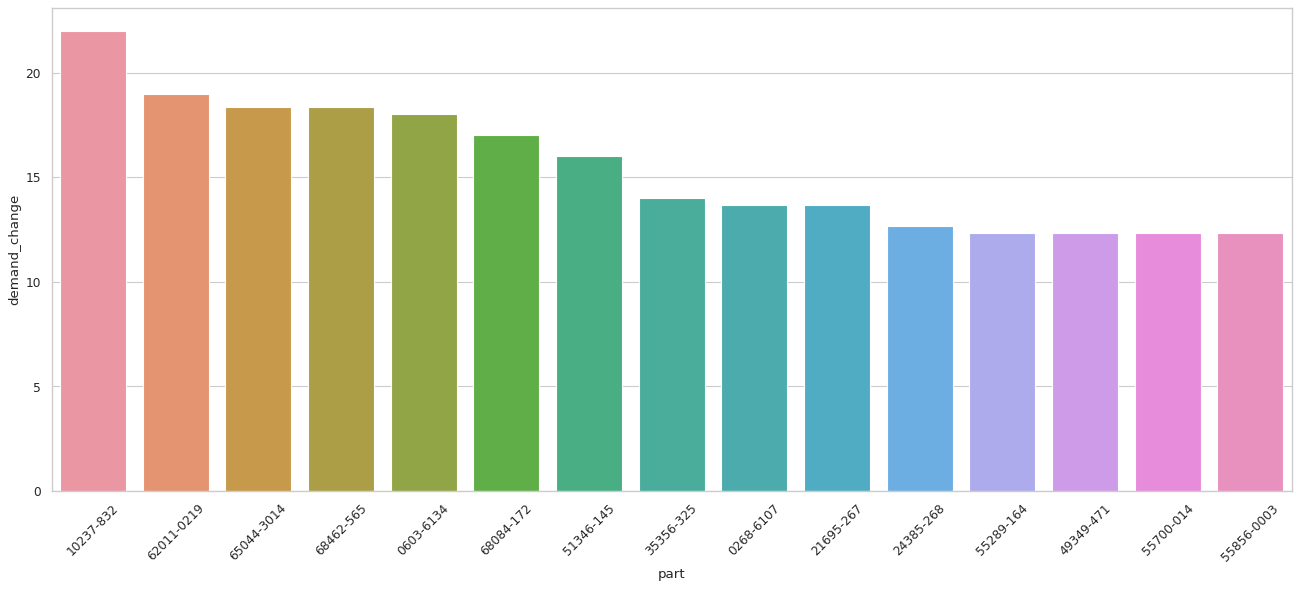

In [ ]:
draw_plot('part','demand_change',parts_demand)

### Popular parts pricing

The most popular parts are those whose demand has increased the most from its 2016/2017 average to 2018. We're interested to find out if popularity is due to a price drop, and also inform us if prices of these parts are properly adjusted.

The demand increase of a part is its 2018 demand minus its 2016/2017 average demand. The price change of a part is its average 2018 price minus its average 2016/2017 price.

Compute the parts whose demand has increased (has positive demand increase) and the change in price for each of these parts. Then visualise this relationship and include in the figure title the correlation (compute via pandas) between these two variables. Conclude which is most likely 1) Parts became more popular from a drop in prices, or 2) The sales department deserved its bonuses.

In [ ]:
# your code goes here
parts_pricing = psql.sqldf("""
            WITH df_orders_demand AS (
            SELECT part,
                COUNT (part) AS all_demand,
                strftime("%Y",date) AS year
            FROM df_transactions_cleaned 
            GROUP BY part,year
            ),df_average_demand AS (
        SELECT part,
                AVG(all_demand) AS average_demand_2016_2017
            FROM df_orders_demand
            GROUP BY part
            HAVING year == '2016' OR year == '2017'
        ), df_2018_demand AS (
        SELECT part,
                all_demand as demand_2018
            FROM df_orders_demand
            WHERE year == '2018'
             ), df_diff_demand AS(
             SELECT df_2018_demand.part,
                     demand_2018,
                    average_demand_2016_2017,
                    demand_2018 - average_demand_2016_2017 AS relative_difference_demand
                FROM df_2018_demand
                INNER JOIN df_average_demand ON df_average_demand.part = df_2018_demand.part
             ),df_average_price AS(
                 SELECT part,
                     AVG(prices_euro) AS average_price_2016_2017
                FROM df_transactions_cleaned
                GROUP BY part
                HAVING strftime("%Y",date) == '2016' OR strftime("%Y",date) == '2017'
             ), df_2018_price AS(
                SELECT part,
                    prices_euro AS price_2018
                FROM df_transactions_cleaned
                WHERE strftime("%Y",date) == '2018'
             ), df_average_2018_price AS(
                 SELECT part,
                 AVG(price_2018) AS average_price_2018
                 FROM df_2018_price
                 GROUP BY part
             ), df_diff_price AS(
                     SELECT df_average_2018_price.part,
                     average_price_2018,
                     average_price_2016_2017,
                     average_price_2018 - average_price_2016_2017 AS relative_difference_price
                FROM df_average_2018_price
                INNER JOIN df_average_price ON df_average_price.part = df_average_2018_price.part
             )
             
        SELECT df_diff_demand.part,
                relative_difference_demand,
                relative_difference_price
            FROM df_diff_demand
            INNER JOIN df_diff_price ON df_diff_price.part = df_diff_demand.part
            WHERE relative_difference_demand > 0
        ORDER BY relative_difference_demand DESC
""")

In [ ]:
parts_pricing

,part,relative_difference_demand,relative_difference_price
0,55289-164,12.333333,-13.804835
1,55700-014,12.333333,5.301403
2,54868-6311,10.333333,-13.224837
3,49288-0285,9.000000,-65.085409
4,21695-931,7.666667,-6.851631
5,0699-7041,6.666667,-40.069165
6,50563-113,6.000000,28.294178
7,13537-259,5.666667,0.561458
8,67544-356,5.666667,-3.945633
9,62670-4404,4.666667,16.853046


In [ ]:
correlation = parts_pricing['relative_difference_demand'].corr(parts_pricing['relative_difference_price'])
correlation

-0.3130349666430926

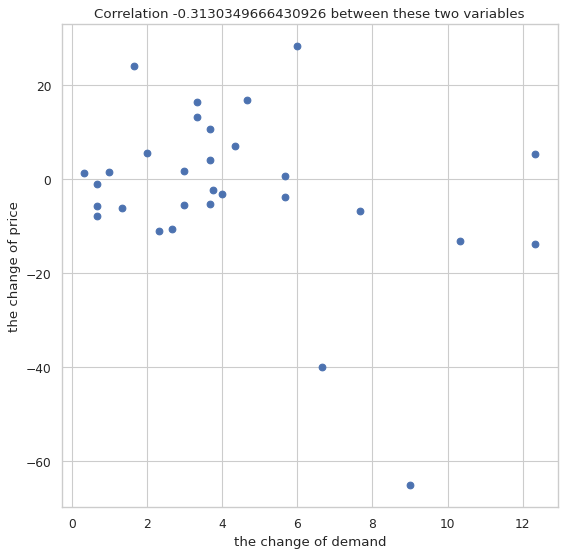

In [ ]:
plt.figure(figsize=(8,8),dpi=80)
plt.scatter(parts_pricing['relative_difference_demand'],parts_pricing['relative_difference_price'])
plt.title("Correlation -0.3130349666430926 between these two variables")
plt.xlabel("the change of demand")
plt.ylabel('the change of price')
plt.show()

As shown in the figure, the parts are more poplular when
their prices falls in the range of 0 to 20 (in figure: 0~-20). Also, the part "55700-014" most deserve its bonuses. The reason is that it raises the price but get more demand.